In [2]:
import numpy as np
from qiskit import *
import matplotlib.pyplot as plt
import matplotlib as mpl
from qiskit.visualization import plot_histogram, plot_bloch_multivector

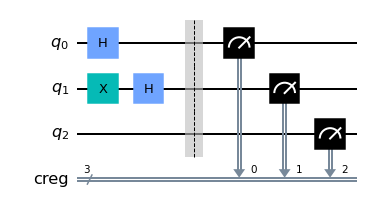

In [15]:
qr = QuantumRegister(3, name='q')
cr = ClassicalRegister(3, name='creg')
qc = QuantumCircuit(qr, cr)
qc.x(1)
qc.h([0,1])
qc.barrier()

qc.measure(0, 0)
qc.measure(1, 1)
qc.measure(2, 2)

qc.draw(output='mpl')

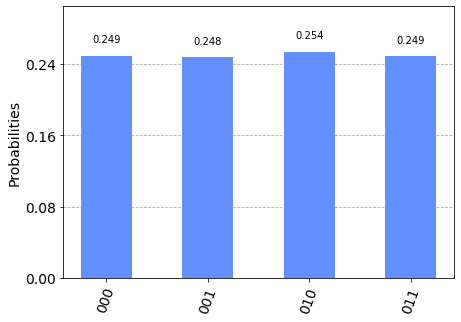

In [23]:
qasm_sim = Aer.get_backend('qasm_simulator')

shots = 20048

t_qpe = transpile(qc, qasm_sim)

qobj = assemble(t_qpe, shots=shots)

results = qasm_sim.run(qobj).result()

answer = results.get_counts()

plot_histogram(answer)